Index(['time', 'pathloss', 'dis', 'att', 'abc'], dtype='object')


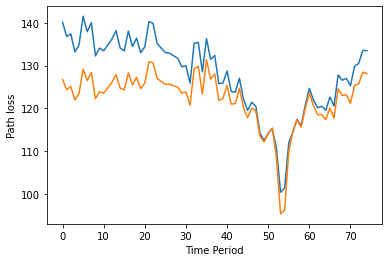

In [1]:
# library import
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# past data preperation
file1 = 'pathloss_s60_i0.0_k0.0_a0.0_sunny.csv'
boston = pd.read_csv(file1)
print(boston.columns)
boston.head()

# distinguish feature, target
feature = boston[['time', 'pathloss', 'dis', 'att', 'abc']]
target = boston[['pathloss']]

# model makeing
X = tf.keras.layers.Input(shape=[5])
H = tf.keras.layers.Dense(10, activation='relu')(X)
y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

#H = tf.keras.layers.Dense(4, activation='swish')(X)
#H1 = tf.keras.layers.Dense(4, activation='swish')(H)
#y = tf.keras.layers.Dense(1)(H1)

# model learning
model.fit(feature,target,epochs=1000,verbose=0)

test_predict = model.predict(feature)

# Plot predictions
plt.plot(target)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Path loss")
plt.show()